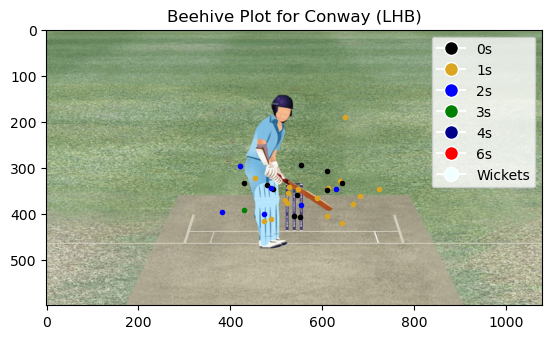

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the regions and conditions for plotting the balls
OldRegStartSS_Y = 189
OldRegStumpHeightSS_Y = 312
OldRegStumpLineSS_Y = 406
OldRegEndSS_Y = 446
OldRegStartSS_X = 144
OldRegEndSS_X = 462

RegStartSS_Y = 90
RegEndSS_Y = 467
RegStartSS_X = 300
RegEndSS_X = 781
RegStumpHeightSS_Y = 335
RegStumpLineSS_Y = 439

def ShortZoneXaxis(HeightX):
    if HeightX >= OldRegStartSS_X and HeightX <= OldRegEndSS_X:
        return (((RegEndSS_X - RegStartSS_X) / (OldRegEndSS_X - OldRegStartSS_X)) * (HeightX - OldRegStartSS_X)) + RegStartSS_X
    else:
        return None

def ShortZoneYaxis(HeightY):
    if HeightY >= OldRegStartSS_Y and HeightY <= OldRegStumpHeightSS_Y:
        return (((RegStumpHeightSS_Y - RegStartSS_Y) / (OldRegStumpHeightSS_Y - OldRegStartSS_Y)) * (HeightY - OldRegStartSS_Y)) + RegStartSS_Y
    elif HeightY > OldRegStumpHeightSS_Y and HeightY <= OldRegStumpLineSS_Y:
        return (((RegStumpLineSS_Y - RegStumpHeightSS_Y) / (OldRegStumpLineSS_Y - OldRegStumpHeightSS_Y)) * (HeightY - OldRegStumpHeightSS_Y)) + RegStumpHeightSS_Y
    elif HeightY > OldRegStumpLineSS_Y and HeightY <= OldRegEndSS_Y:
        return (((RegEndSS_Y - RegStumpLineSS_Y) / (OldRegEndSS_Y - OldRegStumpLineSS_Y)) * (HeightY - OldRegStumpLineSS_Y)) + RegStumpLineSS_Y
    else:
        return None

def plot_balls(x, y, battingtype, ball_type):
    XAxisValue_New = ShortZoneXaxis(x)
    YAxisValue_New = ShortZoneYaxis(y)
    if XAxisValue_New is not None and YAxisValue_New is not None:
        color = get_ball_color(ball_type)
        plt.scatter(x, y, marker='.', color=color, label=ball_type)

def get_ball_color(ball_type):
    colors = {
        '1s': 'goldenrod',
        '2s': 'blue',
        '3s': 'green',
        '0s': 'black',
        'batwkts': 'azure',
        '4s': 'darkblue',
        '6s': 'red'
    }
    return colors.get(ball_type, 'gray')  # Default color for unknown types

def determine_ball_type(row):
    if row['1s'] == 1:
        return '1s'
    elif row['2s'] == 1:
        return '2s'
    elif row['3s'] == 1:
        return '3s'
    elif row['0s'] == 1:
        return '0s'
    elif row['batwkts'] == 1:
        return 'batwkts'
    elif row['4s'] == 1:
        return '4s'
    elif row['6s'] == 1:
        return '6s'
    else:
        return None

image_paths = {
        'RHB': 'C:/Users/sabarish jayakumar/OneDrive/Desktop/KAD/BeeHive/bee_r.jpg',
        'LHB': 'C:/Users/sabarish jayakumar/OneDrive/Desktop/KAD/BeeHive/bee_l.jpg'
}

# Read the CSV file containing x, y, battingtype, StrikerName, and runs columns
data = pd.read_csv('C:/Users/sabarish jayakumar/OneDrive/Desktop/KAD/BeeHive/Height.csv')  # Update with your CSV file path

# Get the unique player names and batting types from the CSV
player_names = data['StrikerName'].unique()

# Ask user for player name
player_name_input = input("Enter the name of the player: ")

# Check if the player name is in the data
if player_name_input in player_names:
    # Filter the data for the specified player
    player_data = data[data['StrikerName'] == player_name_input]
    
    # Get the unique batting types for the specified player
    battingtypes = player_data['battingtype'].unique()
    
    # Plot balls based on x, y, and battingtype values for the specified player
    for battingtype in battingtypes:
        # Load the appropriate image based on battingtype
        beehive_img = plt.imread(image_paths[])
        
        # Plot the beehive image
        plt.imshow(beehive_img)
    
        # Plot balls for the specified player and battingtype
        subset_data = player_data[player_data['battingtype'] == battingtype]
        for index, row in subset_data.iterrows():
            ball_type = determine_ball_type(row)  # Determine the ball type
            if ball_type is not None:
                plot_balls(row['x'], row['y'], row['battingtype'], ball_type)
    
         # Show the legend
        legend_elements = [
                plt.Line2D([0], [0], marker='o', color='w', label='0s', markerfacecolor='black', markersize=10),
                plt.Line2D([0], [0], marker='o', color='w', label='1s', markerfacecolor='goldenrod', markersize=10),
                plt.Line2D([0], [0], marker='o', color='w', label='2s', markerfacecolor='blue', markersize=10),
                plt.Line2D([0], [0], marker='o', color='w', label='3s', markerfacecolor='green', markersize=10),
                plt.Line2D([0], [0], marker='o', color='w', label='4s', markerfacecolor='darkblue', markersize=10),
                plt.Line2D([0], [0], marker='o', color='w', label='6s', markerfacecolor='red', markersize=10),
                plt.Line2D([0], [0], marker='o', color='w', label='Wickets', markerfacecolor='azure', markersize=10),
            ]
        plt.legend(handles=legend_elements, loc='upper right')

        # Show the plot
        plt.title(f"Beehive Plot for {player_name_input} ({battingtype})")
        plt.show()
else:
    print("Player name not found in the data.")


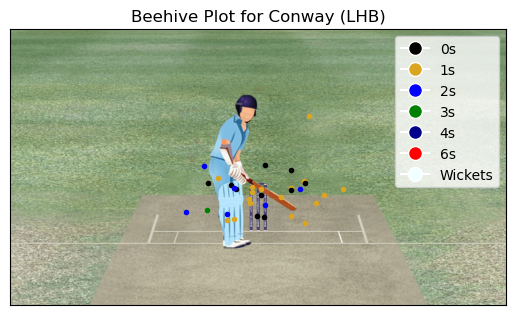

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the regions and conditions for plotting the balls
OldRegStartSS_Y = 189
OldRegStumpHeightSS_Y = 312
OldRegStumpLineSS_Y = 406
OldRegEndSS_Y = 446
OldRegStartSS_X = 144
OldRegEndSS_X = 462

RegStartSS_Y = 90
RegEndSS_Y = 467
RegStartSS_X = 300
RegEndSS_X = 781
RegStumpHeightSS_Y = 335
RegStumpLineSS_Y = 439

width = 0
height = 0

def ShortZoneXaxis(HeightX):
    if HeightX >= OldRegStartSS_X and HeightX <= OldRegEndSS_X:
        return (((RegEndSS_X - RegStartSS_X) / (OldRegEndSS_X - OldRegStartSS_X)) * (HeightX - OldRegStartSS_X)) + RegStartSS_X
    else:
        return None

def ShortZoneYaxis(HeightY):
    if HeightY >= OldRegStartSS_Y and HeightY <= OldRegStumpHeightSS_Y:
        return (((RegStumpHeightSS_Y - RegStartSS_Y) / (OldRegStumpHeightSS_Y - OldRegStartSS_Y)) * (HeightY - OldRegStartSS_Y)) + RegStartSS_Y
    elif HeightY > OldRegStumpHeightSS_Y and HeightY <= OldRegStumpLineSS_Y:
        return (((RegStumpLineSS_Y - RegStumpHeightSS_Y) / (OldRegStumpLineSS_Y - OldRegStumpHeightSS_Y)) * (HeightY - OldRegStumpHeightSS_Y)) + RegStumpHeightSS_Y
    elif HeightY > OldRegStumpLineSS_Y and HeightY <= OldRegEndSS_Y:
        return (((RegEndSS_Y - RegStumpLineSS_Y) / (OldRegEndSS_Y - OldRegStumpLineSS_Y)) * (HeightY - OldRegStumpLineSS_Y)) + RegStumpLineSS_Y
    else:
        return None

def plot_balls(x, y, battingtype, ball_type):
    XAxisValue_New = ShortZoneXaxis(x)
    YAxisValue_New = ShortZoneYaxis(y)
    if XAxisValue_New is not None and YAxisValue_New is not None:
        X = (XAxisValue_New / 1080 * width) - 7
        Y = (YAxisValue_New / 600 * height) - 13
        color = get_ball_color(ball_type)
        plt.scatter(X, Y, marker='.', color=color, label=ball_type)

def get_ball_color(ball_type):
    colors = {
        '1s': 'goldenrod',
        '2s': 'blue',
        '3s': 'green',
        '0s': 'black',
        'Batwkts': 'azure',
        '4s': 'darkblue',
        '6s': 'red'
    }
    return colors.get(ball_type, 'gray')  # Default color for unknown types

def determine_ball_type(row):
    if row['1s'] == 1:
        return '1s'
    elif row['2s'] == 1:
        return '2s'
    elif row['3s'] == 1:
        return '3s'
    elif row['0s'] == 1:
        return '0s'
    elif row['Batwkts'] == 1:
        return 'Batwkts'
    elif row['4s'] == 1:
        return '4s'
    elif row['6s'] == 1:
        return '6s'
    else:
        return None

image_paths = {
        'RHB': 'C:/Users/sabarish jayakumar/OneDrive/Desktop/KAD/BeeHive/bee_r.jpg',
        'LHB': 'C:/Users/sabarish jayakumar/OneDrive/Desktop/KAD/BeeHive/bee_l.jpg'
}

# Read the CSV file containing x, y, battingtype, StrikerName, and runs columns
data = pd.read_csv('C:/Users/sabarish jayakumar/OneDrive/Desktop/KAD/BeeHive/Height.csv')  # Update with your CSV file path

# Get the unique player names and batting types from the CSV
player_names = data['StrikerName'].unique()

# Ask user for player name
player_name_input = input("Enter the name of the player: ")

# Check if the player name is in the data
if player_name_input in player_names:
    # Filter the data for the specified player
    player_data = data[data['StrikerName'] == player_name_input]
    
    # Get the unique batting types for the specified player
    battingtypes = player_data['battingtype'].unique()
    
    # Plot balls based on x, y, and battingtype values for the specified player
    for battingtype in battingtypes:
        # Load the appropriate image based on battingtype
        beehive_img = plt.imread(image_paths[battingtype])
        
        # Get the dimensions of the image
        height, width, _ = beehive_img.shape
    
        # Plot the beehive image
        plt.imshow(beehive_img)
        
        # Remove axis ticks, tick labels, and grid lines
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
    
        # Plot balls for the specified player and battingtype
        subset_data = player_data[player_data['battingtype'] == battingtype]
        for index, row in subset_data.iterrows():
            ball_type = determine_ball_type(row)  # Determine the ball type
            if ball_type is not None:
                plot_balls(row['x'], row['y'], row['battingtype'], ball_type)
    
         # Show the legend
        legend_elements = [
                plt.Line2D([0], [0], marker='o', color='w', label='0s', markerfacecolor='black', markersize=10),
                plt.Line2D([0], [0], marker='o', color='w', label='1s', markerfacecolor='goldenrod', markersize=10),
                plt.Line2D([0], [0], marker='o', color='w', label='2s', markerfacecolor='blue', markersize=10),
                plt.Line2D([0], [0], marker='o', color='w', label='3s', markerfacecolor='green', markersize=10),
                plt.Line2D([0], [0], marker='o', color='w', label='4s', markerfacecolor='darkblue', markersize=10),
                plt.Line2D([0], [0], marker='o', color='w', label='6s', markerfacecolor='red', markersize=10),
                plt.Line2D([0], [0], marker='o', color='w', label='Wickets', markerfacecolor='azure', markersize=10),
            ]
        plt.legend(handles=legend_elements, loc='upper right')

        # Show the plot
        plt.title(f"Beehive Plot for {player_name_input} ({battingtype})")
        plt.show()
else:
    print("Player name not found in the data.")


In [2]:
import pandas as pd
import streamlit as st
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define function to generate beehive plot
def generate_beehive_plot(data, player_name, bowler_type):
    # Filter data based on bowler type
    if bowler_type == "Pace":
        bowler_data = data[data['PaceOrSpin'] == 1]
    elif bowler_type == "Spin":
        bowler_data = data[data['PaceOrSpin'] == 2]
    else:
        bowler_data = data

    # Check if player name is in the data
    if player_name in bowler_data['StrikerName'].unique():
        player_data = bowler_data[bowler_data['StrikerName'] == player_name]
        batting_types = player_data['battingtype'].unique()

        # Load and display the appropriate beehive image
        image_paths = {
            'RHB': 'bee_r.jpg',
            'LHB': 'bee_l.jpg'
        }
        image_path = image_paths[player_data['battingtype'].iloc[0]]  # Assuming each player has a single batting type
        beehive_img = mpimg.imread(image_path)

        # Plot the beehive image
        plt.imshow(beehive_img)
        plt.axis('off')  # Turn off axis
        
        # Plot balls for the specified player and battingtype
        for batting_type in batting_types:
            subset_data = player_data[player_data['battingtype'] == batting_type]
            for _, row in subset_data.iterrows():
                ball_type = determine_ball_type(row)
                if ball_type is not None:
                    plot_balls(row['x'], row['y'], row['battingtype'], ball_type)

        # Show the legend
        legend_elements = [
            plt.Line2D([0], [0], marker='o', color='w', label='0s', markerfacecolor='black', markersize=10),
            plt.Line2D([0], [0], marker='o', color='w', label='1s', markerfacecolor='goldenrod', markersize=10),
            plt.Line2D([0], [0], marker='o', color='w', label='2s', markerfacecolor='blue', markersize=10),
            plt.Line2D([0], [0], marker='o', color='w', label='3s', markerfacecolor='green', markersize=10),
            plt.Line2D([0], [0], marker='o', color='w', label='4s', markerfacecolor='darkblue', markersize=10),
            plt.Line2D([0], [0], marker='o', color='w', label='6s', markerfacecolor='red', markersize=10),
            plt.Line2D([0], [0], marker='o', color='w', label='Wickets', markerfacecolor='azure', markersize=10),
        ]
        plt.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, 0.05), ncol=7, prop={'size':8})

        plt.title(f"Beehive Plot for {player_name}")

        st.pyplot()

    else:
        st.write("Player name not found in the data.")

# Main function to run the app
def main():
    st.title('Beehive Plot Generator')

    # File upload and data processing
    uploaded_file = st.file_uploader("Upload CSV file", type=["csv"])
    if uploaded_file is not None:
        data = pd.read_csv(uploaded_file)
        st.write(data.head())

        # User input
        player_name_input = st.text_input("Enter the name of the player:")
        bowler_type_input = st.radio("Select bowler type:", ("Pace", "Spin", "Both"))

        if st.button("Generate Beehive Plot"):
            generate_beehive_plot(data, player_name_input, bowler_type_input)

# Run the app
if __name__ == "__main__":
    main()


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the regions and conditions for plotting the balls
OldRegStartSS_Y = 189
OldRegStumpHeightSS_Y = 312
OldRegStumpLineSS_Y = 406
OldRegEndSS_Y = 446
OldRegStartSS_X = 144
OldRegEndSS_X = 462

RegStartSS_Y = 90
RegEndSS_Y = 467
RegStartSS_X = 300
RegEndSS_X = 781
RegStumpHeightSS_Y = 335
RegStumpLineSS_Y = 439

width = 0
height = 0

def ShortZoneXaxis(HeightX):
    if HeightX >= OldRegStartSS_X and HeightX <= OldRegEndSS_X:
        return (((RegEndSS_X - RegStartSS_X) / (OldRegEndSS_X - OldRegStartSS_X)) * (HeightX - OldRegStartSS_X)) + RegStartSS_X
    else:
        return None

def ShortZoneYaxis(HeightY):
    if HeightY >= OldRegStartSS_Y and HeightY <= OldRegStumpHeightSS_Y:
        return (((RegStumpHeightSS_Y - RegStartSS_Y) / (OldRegStumpHeightSS_Y - OldRegStartSS_Y)) * (HeightY - OldRegStartSS_Y)) + RegStartSS_Y
    elif HeightY > OldRegStumpHeightSS_Y and HeightY <= OldRegStumpLineSS_Y:
        return (((RegStumpLineSS_Y - RegStumpHeightSS_Y) / (OldRegStumpLineSS_Y - OldRegStumpHeightSS_Y)) * (HeightY - OldRegStumpHeightSS_Y)) + RegStumpHeightSS_Y
    elif HeightY > OldRegStumpLineSS_Y and HeightY <= OldRegEndSS_Y:
        return (((RegEndSS_Y - RegStumpLineSS_Y) / (OldRegEndSS_Y - OldRegStumpLineSS_Y)) * (HeightY - OldRegStumpLineSS_Y)) + RegStumpLineSS_Y
    else:
        return None

def plot_balls(x, y, ball_type, image_path):
    XAxisValue_New = ShortZoneXaxis(x)
    YAxisValue_New = ShortZoneYaxis(y)
    if XAxisValue_New is not None and YAxisValue_New is not None:
        X = (XAxisValue_New / 1080 * width) - 7
        Y = (YAxisValue_New / 600 * height) - 13
        color = get_ball_color(ball_type)
        plt.scatter(X, Y, marker='.', color=color, label=ball_type)

def get_ball_color(ball_type):
    colors = {
        '1s': 'goldenrod',
        '2s': 'blue',
        '3s': 'green',
        '0s': 'black',
        'batwkts': 'azure',
        '4s': 'darkblue',
        '6s': 'red'
    }
    return colors.get(ball_type, 'gray')  # Default color for unknown types

def determine_ball_type(row):
    if row['1s'] == 1:
        return '1s'
    elif row['2s'] == 1:
        return '2s'
    elif row['3s'] == 1:
        return '3s'
    elif row['0s'] == 1:
        return '0s'
    elif row['batwkts'] == 1:
        return 'batwkts'
    elif row['4s'] == 1:
        return '4s'
    elif row['6s'] == 1:
        return '6s'
    else:
        return None

image_paths = {
    'RHB': 'C:/Users/sabarish jayakumar/OneDrive/Desktop/KAD/BeeHive/bee_r.jpg',
    'LHB': 'C:/Users/sabarish jayakumar/OneDrive/Desktop/KAD/BeeHive/bee_l.jpg'
}

# Read the CSV file containing x, y, battingtype, StrikerName, and runs columns
data = pd.read_csv('C:/Users/sabarish jayakumar/OneDrive/Desktop/KAD/BeeHive/Height.csv')  

def main():
    global width, height

    # Ask user for player name and bowler type input
    player_name_input = input("Enter the name of the player: ")
    bowler_type_input = input("Enter '1' for pace, '2' for spin, or '3' for both: ")

    # Prompt the user to input specific runs or 'all'
    specific_runs = input("Enter specific runs (0s, 1s, 2s, 3s, 4s, 6s, batwkts) or 'all' for all runs: ")

    # Filter data based on specific runs
    if specific_runs == 'all':
        player_data = data[data['StrikerName'] == player_name_input]
    else:
        player_data = data[(data['StrikerName'] == player_name_input) & (data[specific_runs] == 1)]

    # Filter data based on bowler type
    if bowler_type_input == '1':
        player_data = player_data[player_data['PaceorSpin'] == 1]
    elif bowler_type_input == '2':
        player_data = player_data[player_data['PaceorSpin'] == 2]
    elif bowler_type_input == '3':
        pass  # No need to filter if both pace and spin are selected
    else:
        print("Invalid input for bowler type. Please enter '1', '2', or '3'.")
        return

    # Check if the player name is in the data
    if player_name_input in data['StrikerName'].unique():
        batting_type = data[data['StrikerName'] == player_name_input]['BattingType'].iloc[0]
        image_path = image_paths.get(batting_type)
        if image_path is None:
            print(f"Image path not found for batting type '{batting_type}'.")
            return
        
        beehive_img = plt.imread(image_path)
        height, width, _ = beehive_img.shape
        plt.imshow(beehive_img)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)

        # Plot balls based on filtered data
        for index, row in player_data.iterrows():
            ball_type = determine_ball_type(row) 
            if ball_type is not None:
                plot_balls(row['x'], row['y'], ball_type, image_path)

         # Show the legend
            legend_elements = [
                    plt.Line2D([0], [0], marker='o', color='w', label='0s', markerfacecolor='black', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', label='1s', markerfacecolor='goldenrod', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', label='2s', markerfacecolor='blue', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', label='3s', markerfacecolor='green', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', label='4s', markerfacecolor='darkblue', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', label='6s', markerfacecolor='red', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', label='Out', markerfacecolor='azure', markersize=10),
                ]
            plt.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, 0.05), ncol=7, prop={'size': 6})

            # Show the plot with appropriate title
            plt.title(f"Beehive for {player_name_input} against {bowler_type_input} bowlers")
            plt.show()
    else:
        print("Player name not found in the data.")

if __name__ == "__main__":
    main()

KeyError: 'BattingType'

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib qt
# Define the regions and conditions for plotting the balls
OldRegStartSS_Y = 189
OldRegStumpHeightSS_Y = 312
OldRegStumpLineSS_Y = 406
OldRegEndSS_Y = 446
OldRegStartSS_X = 144
OldRegEndSS_X = 462

RegStartSS_Y = 90
RegEndSS_Y = 467
RegStartSS_X = 300
RegEndSS_X = 781
RegStumpHeightSS_Y = 335
RegStumpLineSS_Y = 439

width = 0
height = 0

def ShortZoneXaxis(HeightX):
    if HeightX >= OldRegStartSS_X and HeightX <= OldRegEndSS_X:
        return (((RegEndSS_X - RegStartSS_X) / (OldRegEndSS_X - OldRegStartSS_X)) * (HeightX - OldRegStartSS_X)) + RegStartSS_X
    else:
        return None

def ShortZoneYaxis(HeightY):
    if HeightY >= OldRegStartSS_Y and HeightY <= OldRegStumpHeightSS_Y:
        return (((RegStumpHeightSS_Y - RegStartSS_Y) / (OldRegStumpHeightSS_Y - OldRegStartSS_Y)) * (HeightY - OldRegStartSS_Y)) + RegStartSS_Y
    elif HeightY > OldRegStumpHeightSS_Y and HeightY <= OldRegStumpLineSS_Y:
        return (((RegStumpLineSS_Y - RegStumpHeightSS_Y) / (OldRegStumpLineSS_Y - OldRegStumpHeightSS_Y)) * (HeightY - OldRegStumpHeightSS_Y)) + RegStumpHeightSS_Y
    elif HeightY > OldRegStumpLineSS_Y and HeightY <= OldRegEndSS_Y:
        return (((RegEndSS_Y - RegStumpLineSS_Y) / (OldRegEndSS_Y - OldRegStumpLineSS_Y)) * (HeightY - OldRegStumpLineSS_Y)) + RegStumpLineSS_Y
    else:
        return None

def plot_balls(x, y, StrikerBattingType, ball_type):
    XAxisValue_New = ShortZoneXaxis(x)
    YAxisValue_New = ShortZoneYaxis(y)
    if XAxisValue_New is not None and YAxisValue_New is not None:
        X = (XAxisValue_New / 1080 * width) - 7
        Y = (YAxisValue_New / 600 * height) - 13
        color = get_ball_color(ball_type)
        plt.scatter(X, Y, marker='o', color=color, label=ball_type)

def get_ball_color(ball_type):
    colors = {
        '1s': 'goldenrod',
        '2s': 'blue',
        '3s': 'green',
        '0s': 'black',
        'batwkts': 'azure',
        '4s': 'darkblue',
        '6s': 'red'
    }
    return colors.get(ball_type, 'gray')  # Default color for unknown types

def determine_ball_type(row):
    if row['1s'] == 1:
        return '1s'
    elif row['2s'] == 1:
        return '2s'
    elif row['3s'] == 1:
        return '3s'
    elif row['0s'] == 1:
        return '0s'
    elif row['batwkts'] == 1:
        return 'batwkts'
    elif row['4s'] == 1:
        return '4s'
    elif row['6s'] == 1:
        return '6s'
    else:
        return None

image_paths = {
        '1': 'bee_r.jpg',
        '2': 'bee_l.jpg'
}

# Read the CSV file containing x, y, battingtype, StrikerName, and runs columns
data = pd.read_csv('NewData.csv')  # Update with your CSV file path
player_name_input = input("Enter the name of the player: ")
# Ask user for type of bowler (Pace, Spin, or Both)
bowler_type_input = input("Enter the type of bowler (Pace:1, Spin:2, or Both:3): ")

# Get the data based on the bowler type
if bowler_type_input == "1":
    bowler_data = data[data['PaceorSpin'] == 1]
elif bowler_type_input == "2":
    bowler_data = data[data['PaceorSpin'] == 2]
elif bowler_type_input== "3":
    bowler_data = data
else:
    print("Invalid input. Please enter 'Pace', 'Spin', or 'Both'.")
    exit()

# Get the unique player names and batting types from the bowler data
player_names = bowler_data['StrikerName'].unique()

# Ask user for player name


# Check if the player name is in the bowler data
if player_name_input in player_names:
    # Filter the data for the specified player
    player_data = bowler_data[bowler_data['StrikerName'] == player_name_input]
    
    # Get the unique batting types for the specified player
    battingtypes = player_data['StrikerBattingType'].unique()
    
    # Plot balls based on x, y, and battingtype values for the specified player
    for battingtype in battingtypes:
        # Load the appropriate image based on battingtype
        beehive_img = plt.imread(image_paths['StrikerBattingType'])
        
        # Get the dimensions of the image
        height, width, _ = beehive_img.shape
    
        # Plot the beehive image
        plt.imshow(beehive_img)
        
        # Remove axis ticks, tick labels, and grid lines
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
    
        # Plot balls for the specified player and battingtype
        subset_data = player_data[player_data['StrikerBattingType'] == battingtype]
        for index, row in subset_data.iterrows():
            ball_type = determine_ball_type(row)  # Determine the ball type
            if ball_type is not None:
                plot_balls(row['HeighX'], row['HeightY'], row['StrikerBattingType'], ball_type)
    
         # Show the legend
        legend_elements = [
                plt.Line2D([0], [0], marker='o', color='w', label='0s', markerfacecolor='black', markersize=10),
                plt.Line2D([0], [0], marker='o', color='w', label='1s', markerfacecolor='goldenrod', markersize=10),
                plt.Line2D([0], [0], marker='o', color='w', label='2s', markerfacecolor='blue', markersize=10),
                plt.Line2D([0], [0], marker='o', color='w', label='3s', markerfacecolor='green', markersize=10),
                plt.Line2D([0], [0], marker='o', color='w', label='4s', markerfacecolor='darkblue', markersize=10),
                plt.Line2D([0], [0], marker='o', color='w', label='6s', markerfacecolor='red', markersize=10),
                plt.Line2D([0], [0], marker='o', color='w', label='Wickets', markerfacecolor='azure', markersize=10),
            ]
        plt.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, 0.05), ncol=7, prop={'size':8})

        # Show the plot
        plt.title(f"Beehive Plot for {player_name_input} ")
        plt.show()
else:
    print("Player name not found in the data.")




# F_I_N_A_L F_O_R B_E_E_H_I_V_E
# F_I_N_A_L F_O_R B_E_E_H_I_V_E
# F_I_N_A_L F_O_R B_E_E_H_I_V_E
# F_I_N_A_L F_O_R B_E_E_H_I_V_E
# F_I_N_A_L F_O_R B_E_E_H_I_V_E

KeyError: 'StrikerBattingType'

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib qt

# Define the regions and conditions for plotting the balls
OldRegStartSS_Y = 189
OldRegStumpHeightSS_Y = 312
OldRegStumpLineSS_Y = 406
OldRegEndSS_Y = 446
OldRegStartSS_X = 144
OldRegEndSS_X = 462

RegStartSS_Y = 90
RegEndSS_Y = 467
RegStartSS_X = 300
RegEndSS_X = 781
RegStumpHeightSS_Y = 335
RegStumpLineSS_Y = 439

width = 0
height = 0

def ShortZoneXaxis(HeightX):
    if HeightX >= OldRegStartSS_X and HeightX <= OldRegEndSS_X:
        return (((RegEndSS_X - RegStartSS_X) / (OldRegEndSS_X - OldRegStartSS_X)) * (HeightX - OldRegStartSS_X)) + RegStartSS_X
    else:
        return None

def ShortZoneYaxis(HeightY):
    if HeightY >= OldRegStartSS_Y and HeightY <= OldRegStumpHeightSS_Y:
        return (((RegStumpHeightSS_Y - RegStartSS_Y) / (OldRegStumpHeightSS_Y - OldRegStartSS_Y)) * (HeightY - OldRegStartSS_Y)) + RegStartSS_Y
    elif HeightY > OldRegStumpHeightSS_Y and HeightY <= OldRegStumpLineSS_Y:
        return (((RegStumpLineSS_Y - RegStumpHeightSS_Y) / (OldRegStumpLineSS_Y - OldRegStumpHeightSS_Y)) * (HeightY - OldRegStumpHeightSS_Y)) + RegStumpHeightSS_Y
    elif HeightY > OldRegStumpLineSS_Y and HeightY <= OldRegEndSS_Y:
        return (((RegEndSS_Y - RegStumpLineSS_Y) / (OldRegEndSS_Y - OldRegStumpLineSS_Y)) * (HeightY - OldRegStumpLineSS_Y)) + RegStumpLineSS_Y
    else:
        return None

def plot_balls(x, y, StrikerBattingType, ball_type):
    XAxisValue_New = ShortZoneXaxis(x)
    YAxisValue_New = ShortZoneYaxis(y)
    if XAxisValue_New is not None and YAxisValue_New is not None:
        X = (XAxisValue_New / 1080 * width) - 7
        Y = (YAxisValue_New / 600 * height) - 13
        color = get_ball_color(ball_type)
        plt.scatter(X, Y, marker='o', color=color, label=ball_type)

def get_ball_color(ball_type):
    colors = {
        '1s': 'goldenrod',
        '2s': 'blue',
        '3s': 'green',
        '0s': 'black',
        'Batwkts': 'azure',
        '4s': 'darkblue',
        '6s': 'red'
    }
    return colors.get(ball_type, 'gray')  # Default color for unknown types

def determine_ball_type(row):
    if row['1s'] == 1:
        return '1s'
    elif row['2s'] == 1:
        return '2s'
    elif row['3s'] == 1:
        return '3s'
    elif row['0s'] == 1:
        return '0s'
    elif row['Batwkts'] == 1:
        return 'Batwkts'
    elif row['4s'] == 1:
        return '4s'
    elif row['6s'] == 1:
        return '6s'
    else:
        return None

image_paths = {
        '1': 'bee_r.jpg',
        '2': 'bee_l.jpg'
}

# Read the CSV file containing x, y, battingtype, StrikerName, and runs columns
data = pd.read_csv('NewData.csv')  # Update with your CSV file path
player_name_input = input("Enter the name of the player: ")
# Ask user for type of bowler (Pace, Spin, or Both)
bowler_type_input = input("Enter the type of bowler (Pace:1, Spin:2, or Both:3): ")

# Get the data based on the bowler type
if bowler_type_input == "1":
    bowler_data = data[data['PaceorSpin'] == 1]
elif bowler_type_input == "2":
    bowler_data = data[data['PaceorSpin'] == 2]
elif bowler_type_input== "3":
    bowler_data = data
else:
    print("Invalid input. Please enter 'Pace', 'Spin', or 'Both'.")
    exit()

# Get the unique player names and batting types from the bowler data
player_names = bowler_data['StrikerName'].unique()

# Check if the player name is in the bowler data
if player_name_input in player_names:
    # Filter the data for the specified player
    player_data = bowler_data[bowler_data['StrikerName'] == player_name_input]
    
    # Get the unique batting types for the specified player
    battingtypes = player_data['StrikerBattingType'].unique()
    
    # Plot balls based on x, y, and battingtype values for the specified player
    for battingtype in battingtypes:
        # Load the appropriate image based on battingtype
        beehive_img = plt.imread(image_paths[str(battingtype)])
        
        # Get the dimensions of the image
        height, width, _ = beehive_img.shape
    
        # Plot the beehive image
        plt.imshow(beehive_img)
        
        # Remove axis ticks, tick labels, and grid lines
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
    
        # Plot balls for the specified player and battingtype
        subset_data = player_data[player_data['StrikerBattingType'] == battingtype]
        for index, row in subset_data.iterrows():
            ball_type = determine_ball_type(row)  # Determine the ball type
            if ball_type is not None:
                plot_balls(row['HeightX'], row['HeightY'], row['StrikerBattingType'], ball_type)
    
         # Show the legend
        legend_elements = [
                plt.Line2D([0], [0], marker='o', color='w', label='0s', markerfacecolor='black', markersize=10),
                plt.Line2D([0], [0], marker='o', color='w', label='1s', markerfacecolor='goldenrod', markersize=10),
                plt.Line2D([0], [0], marker='o', color='w', label='2s', markerfacecolor='blue', markersize=10),
                plt.Line2D([0], [0], marker='o', color='w', label='3s', markerfacecolor='green', markersize=10),
                plt.Line2D([0], [0], marker='o', color='w', label='4s', markerfacecolor='darkblue', markersize=10),
                plt.Line2D([0], [0], marker='o', color='w', label='6s', markerfacecolor='red', markersize=10),
                plt.Line2D([0], [0], marker='o', color='w', label='Wickets', markerfacecolor='azure', markersize=10),
            ]
        plt.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, 0.05), ncol=7, prop={'size':8})

        # Show the plot
        plt.title(f"Beehive Plot for {player_name_input} ")
        plt.show()
else:
    print("Player name not found in the data.")
